In [1]:
from create_data import DumbCirc as dc
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 1, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [ ]:
model_zero = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp, mapping_dim=6, negative_cloud=fnc)

In [ ]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model_zero.set_device(device)

In [ ]:
model_zero.train(num_epochs=10, batch_size=20, learning_rate=0.0001)

In [ ]:
model_zero.set_test_data(tc, lt)

In [ ]:
model_zero.predict()

In [ ]:
model_zero.set_test_data(pc[2:4, :], lp[2:4, :])

In [ ]:
model_zero.predict()

In [9]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=6, negative_cloud=fnc)

In [10]:
device = "cpu"
model_bin.set_device(device)

In [11]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.0001, kind='b')

RuntimeError: running_mean should contain 4 elements not 258

In [7]:
model_bin.set_test_data(tc, lt)

tensor([[1.0000e+00, 9.9393e-01, 9.7611e-01,  ..., 5.9583e-02, 3.9033e-18,
         2.9372e-03],
        [9.9393e-01, 1.0000e+00, 9.9402e-01,  ..., 7.6608e-02, 1.0414e-17,
         3.4028e-03],
        [9.7611e-01, 9.9402e-01, 1.0000e+00,  ..., 9.6988e-02, 2.7202e-17,
         3.8536e-03],
        ...,
        [5.9583e-02, 7.6608e-02, 9.6988e-02,  ..., 1.0000e+00, 3.1807e-10,
         1.8122e-02],
        [3.9033e-18, 1.0414e-17, 2.7202e-17,  ..., 3.1807e-10, 1.0000e+00,
         9.5583e-15],
        [2.9372e-03, 3.4028e-03, 3.8536e-03,  ..., 1.8122e-02, 9.5583e-15,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0007,  0.0023,  0.0057,  ..., -0.0116, -0.0098, -0.0080],
       grad_fn=<MvBackward0>)


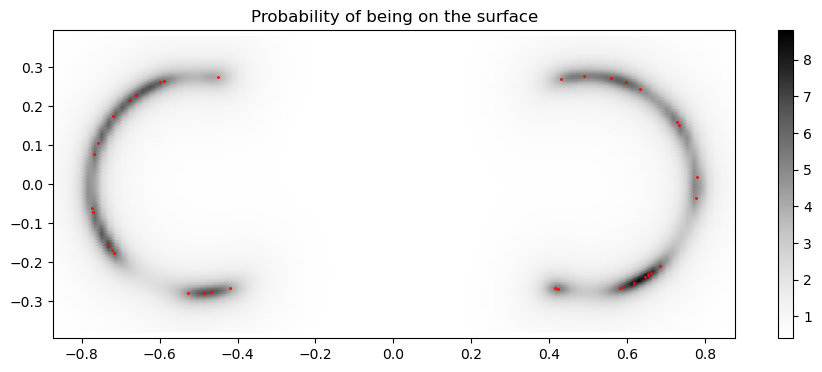

In [8]:
model_bin.predict()

In [9]:
model_bin.get_posterior_test(tc[0])

tensor([[1.0000e+00, 1.4388e-07, 1.7474e-10,  ..., 3.4928e-01, 5.8492e-10,
         1.3783e-01],
        [1.4388e-07, 1.0000e+00, 1.1331e-02,  ..., 1.8360e-05, 1.7171e-04,
         8.8260e-07],
        [1.7474e-10, 1.1331e-02, 1.0000e+00,  ..., 5.7026e-07, 3.1874e-01,
         7.0329e-12],
        ...,
        [3.4928e-01, 1.8360e-05, 5.7026e-07,  ..., 1.0000e+00, 2.1764e-06,
         1.5102e-02],
        [5.8492e-10, 1.7171e-04, 3.1874e-01,  ..., 2.1764e-06, 1.0000e+00,
         1.4390e-12],
        [1.3783e-01, 8.8260e-07, 7.0329e-12,  ..., 1.5102e-02, 1.4390e-12,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([ 0.0012, -0.0021, -0.0006,  0.0012,  0.0023, -0.0032,  0.0071,  0.0009,
         0.0053, -0.0076,  0.0072,  0.0025,  0.0025,  0.0029, -0.0086,  0.0026,
         0.0020,  0.0072, -0.0117, -0.0025, -0.0052,  0.0124, -0.0030, -0.0115,
        -0.0057, -0.0083,  0.0050,  0.0007, -0.0114, -0.0104, -0.0149, -0.0067,
         0.0073,  0.0023, -0.0114], grad_fn=<MvBackward0>)
t

In [10]:
model_bin.get_posterior_test(fpc[1])

tensor([[1.0000e+00, 1.4432e-02, 6.4615e-01,  ..., 2.2544e-03, 2.0505e-04,
         8.3201e-06],
        [1.4432e-02, 1.0000e+00, 1.4546e-03,  ..., 8.3677e-01, 7.5694e-07,
         3.0199e-03],
        [6.4615e-01, 1.4546e-03, 1.0000e+00,  ..., 1.7453e-04, 1.3200e-05,
         5.4459e-06],
        ...,
        [2.2544e-03, 8.3677e-01, 1.7453e-04,  ..., 1.0000e+00, 4.8962e-08,
         5.8893e-03],
        [2.0505e-04, 7.5694e-07, 1.3200e-05,  ..., 4.8962e-08, 1.0000e+00,
         7.1902e-16],
        [8.3201e-06, 3.0199e-03, 5.4459e-06,  ..., 5.8893e-03, 7.1903e-16,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0001,  0.0043, -0.0096, -0.0172,  0.0107,  0.0014, -0.0089,  0.0197,
        -0.0037,  0.0028,  0.0083, -0.0059, -0.0097,  0.0071, -0.0141,  0.0233,
        -0.0011, -0.0063,  0.0175, -0.0023, -0.0044, -0.0193, -0.0074, -0.0100,
         0.0134, -0.0075, -0.0146,  0.0058, -0.0106, -0.0031,  0.0008, -0.0070,
        -0.0187,  0.0142,  0.0059, -0.0004, -0.0056, -0.0162

In [11]:
model_bin.set_test_data(pc[2:4, :], lp[2:4, :])

tensor([[1.0000e+00, 9.9563e-01, 9.8242e-01,  ..., 1.0158e-04, 4.8152e-01,
         1.4556e-01],
        [9.9563e-01, 1.0000e+00, 9.9552e-01,  ..., 1.3627e-04, 5.1664e-01,
         1.4368e-01],
        [9.8242e-01, 9.9552e-01, 1.0000e+00,  ..., 1.8089e-04, 5.4896e-01,
         1.4005e-01],
        ...,
        [1.0158e-04, 1.3627e-04, 1.8089e-04,  ..., 1.0000e+00, 8.4329e-03,
         3.0736e-03],
        [4.8152e-01, 5.1664e-01, 5.4896e-01,  ..., 8.4329e-03, 1.0000e+00,
         3.8603e-01],
        [1.4556e-01, 1.4368e-01, 1.4005e-01,  ..., 3.0736e-03, 3.8603e-01,
         1.0000e+00]], grad_fn=<AddBackward0>)
tensor([-0.0066, -0.0089, -0.0111,  ..., -0.0087, -0.0080, -0.0071],
       grad_fn=<MvBackward0>)
tensor([[1.0000, 0.9954, 0.9818,  ..., 0.4735, 0.0190, 0.0764],
        [0.9954, 1.0000, 0.9955,  ..., 0.5232, 0.0192, 0.0711],
        [0.9818, 0.9955, 1.0000,  ..., 0.5735, 0.0193, 0.0661],
        ...,
        [0.4735, 0.5232, 0.5735,  ..., 1.0000, 0.0500, 0.0573],
        [0.0

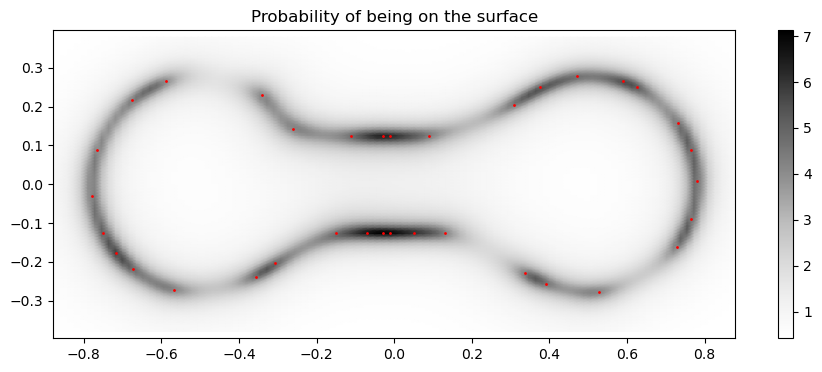

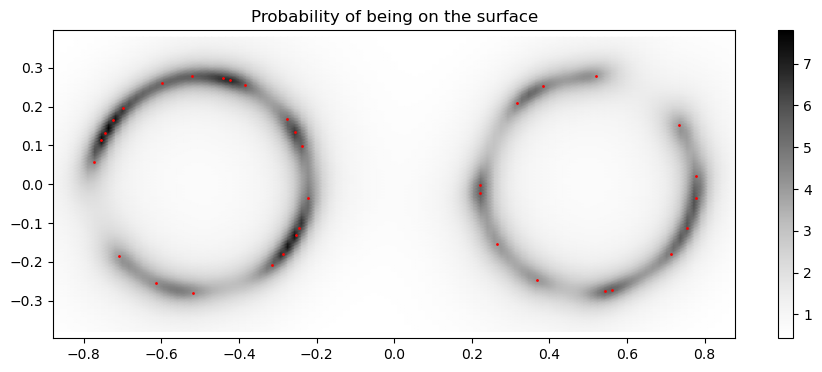

In [12]:
model_bin.predict()